In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.stats as st
from scipy import stats


In [55]:
df = pd.read_csv('air.csv', encoding='windows-1251', sep=',')
print(df.head())
print(df.describe())

# Оставляем только числовые столбцы
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1] 

# Фильтрация для сильной корреляции (например, выше 0.7 по модулю)
strong_correlations = high_corr_pairs[abs(high_corr_pairs) > 0.7]
print(strong_correlations)


   n      id  Gender      Customer Type  Age   Type of Travel     Class  \
0  0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1  1    5047    Male  disloyal Customer   25  Business travel  Business   
2  2  110028  Female     Loyal Customer   26  Business travel  Business   
3  3   24026  Female     Loyal Customer   25  Business travel  Business   
4  4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boa

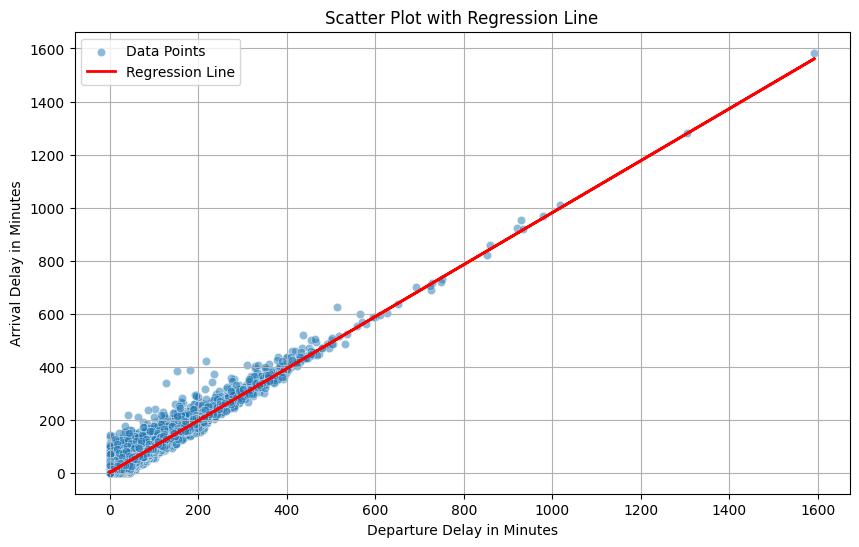

Коэффициент корреляции =  0.9654809013755755 
Величина достоверности аппроксимации R^2 =  0.9321533709209897


In [56]:
df_1 = df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].dropna()  # Оставляем только нужные столбцы и убираем пропуски

departure_arrival_correlation = df_1['Departure Delay in Minutes'].corr(df_1['Arrival Delay in Minutes'])

X = df_1['Departure Delay in Minutes'].values.reshape(-1, 1)
y = df_1['Arrival Delay in Minutes'].values

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

r_squared_delay = regressor.score(X, y)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', data=df_1, alpha=0.5, label='Data Points')
plt.plot(df_1['Departure Delay in Minutes'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

print("Коэффициент корреляции = ",departure_arrival_correlation,"\n" "Величина достоверности аппроксимации R^2 = ", r_squared_delay)

In [57]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

columns_of_interest = ['Age', 'Flight Distance', 'Class', 'Type of Travel']
df = df[columns_of_interest].dropna()
print(f"Размер датасета после удаления пропущенных значений: {df.shape[0]} наблюдений")

random_sample = df.sample(frac=0.33, random_state=42)
print(f"\nРазмер случайной выборки: {random_sample.shape[0]} наблюдений")

df['strata'] = df['Class'] + '_' + df['Type of Travel']

print("\nРаспределение наблюдений по стратам:")
strata_distribution = df['strata'].value_counts()
print(strata_distribution)

_, stratified_sample = train_test_split(
    df,
    test_size=0.33,
    stratify=df['strata'],
    random_state=42
)
print(f"\nРазмер стратифицированной выборки: {stratified_sample.shape[0]} наблюдений")

metrics = ['Age', 'Flight Distance']

means_df = pd.DataFrame(index=['Генеральная совокупность', 'Случайная выборка', 'Стратифицированная выборка'])
for metric in metrics:
    means_df[metric] = [
        df[metric].mean(),
        random_sample[metric].mean(),
        stratified_sample[metric].mean()
    ]

print("\nСредние значения:")
print(means_df)

confidence_levels = [0.90, 0.95, 0.99]

results = {}

for metric in metrics:
    results[metric] = {}
    mean_full = df[metric].mean()
    
    print(f"\n{'-'*60}")
    print(f"Результаты для {metric}:")
    print(f"Среднее генеральной совокупности: {mean_full:.2f}")
    print(f"{'-'*60}")
    
    for conf_level in confidence_levels:
        ci_random = stats.t.interval(
            confidence=conf_level,
            df=len(random_sample[metric])-1,
            loc=random_sample[metric].mean(),
            scale=stats.sem(random_sample[metric])
        )
        
        ci_stratified = stats.t.interval(
            confidence=conf_level,
            df=len(stratified_sample[metric])-1,
            loc=stratified_sample[metric].mean(),
            scale=stats.sem(stratified_sample[metric])
        )
        
        print(f"\n{int(conf_level*100)}% доверительный интервал:")
        print(f"{'='*40}")
        print("Случайная выборка:")
        print(f"Нижняя граница: {ci_random[0]:.2f}")
        print(f"Верхняя граница: {ci_random[1]:.2f}")
        print(f"Среднее выборки: {random_sample[metric].mean():.2f}")
        print("\nСтратифицированная выборка:")
        print(f"Нижняя граница: {ci_stratified[0]:.2f}")
        print(f"Верхняя граница: {ci_stratified[1]:.2f}")
        print(f"Среднее выборки: {stratified_sample[metric].mean():.2f}")

Размер датасета после удаления пропущенных значений: 103904 наблюдений

Размер случайной выборки: 34288 наблюдений

Распределение наблюдений по стратам:
strata
Business_Business travel    47508
Eco_Personal Travel         26488
Eco_Business travel         20257
Eco Plus_Business travel     3890
Eco Plus_Personal Travel     3604
Business_Personal Travel     2157
Name: count, dtype: int64

Размер стратифицированной выборки: 34289 наблюдений

Средние значения:
                             Age  Flight Distance
Генеральная совокупность   39.38          1189.45
Случайная выборка          39.45          1187.49
Стратифицированная выборка 39.43          1191.13

------------------------------------------------------------
Результаты для Age:
Среднее генеральной совокупности: 39.38
------------------------------------------------------------

90% доверительный интервал:
Случайная выборка:
Нижняя граница: 39.32
Верхняя граница: 39.59
Среднее выборки: 39.45

Стратифицированная выборка:
Нижняя гра

Описание полученных результатов:
1. Стратификация выборки:
Для создания стратифицированной выборки мы использовали комбинацию двух важных характеристик пассажиров: Class (класс обслуживания) и Type of Travel (тип путешествия), что позволило сохранить пропорции различных категорий пассажиров в выборке.
2. Сравнение средних значений:
Для дальности полёта (Flight Distance) средние значения во всех трёх группах (генеральная совокупность, случайная и стратифицированная выборки) очень близки, что говорит о хорошей репрезентативности обеих выборок
Для возраста (Age) обе выборки также показали средние значения, близкие к генеральной совокупности
3. Доверительные интервалы:
- С увеличением уровня доверия (от 90% до 99%) интервалы закономерно расширяются
- Среднее значение генеральной совокупности попадает в доверительные интервалы обеих выборок на всех уровнях доверия, что подтверждает надёжность наших выборок
- Стратифицированная выборка показала немного более узкие доверительные интервалы, что говорит о её большей точности

Обе выборки (случайная и стратифицированная) хорошо представляют генеральную совокупность, но стратифицированная выборка показала чуть более точные результаты, что подтверждает эффективность выбранного метода стратификации.